<a href="https://colab.research.google.com/github/jeel-coder/Synapse_LP/blob/week3/Copy_of_Synapse_LP_Task_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3**

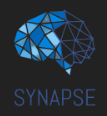

**Unsupervised Learning**

Unsupervised learning can be broken down into three main tasks:

1.   Clustering
2.   Association rules
3.   Dimensionality reduction

Let's explore these topics :))  

Clustering is an unsupervised learning technique used to group similar data points together. It's widely used in various applications like customer segmentation, anomaly detection, and more. In this task, we'll explore different clustering algorithms and visualize their results.

We will work with the Country dataset. This dataset consists of information that determine the socio-economic factors of a country - exports, imports, income, life expectancy, gdpp, etc. The main aim of this task is to find the countries which are in dire need of financial aid.

The dataset that will be used can be found here - [DATA](https://drive.google.com/drive/folders/1FMMMeniP32-G5j_s15S89z7LDlB1Xe9j?usp=drive_link)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from ipywidgets import interact
import os
import warnings
warnings.filterwarnings("ignore")

Mount your drive

In [2]:
# code here
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# load the data
data = '/content/gdrive/MyDrive/Country-data.csv'  # Mention the path in the strings below
df = pd.read_csv(data)

# Understanding the data

In [4]:
# print 1st few rows of the dataset, its shape and the columns
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
# check for null values
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# check for any duplicated values
duplicated_rows = df[df.duplicated()]
duplicated_rows#no duplicated row

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [10]:
df_heatmap=df.drop(columns='country')

In [11]:
corr_matrix = df_heatmap.corr()
print(corr_matrix)

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  

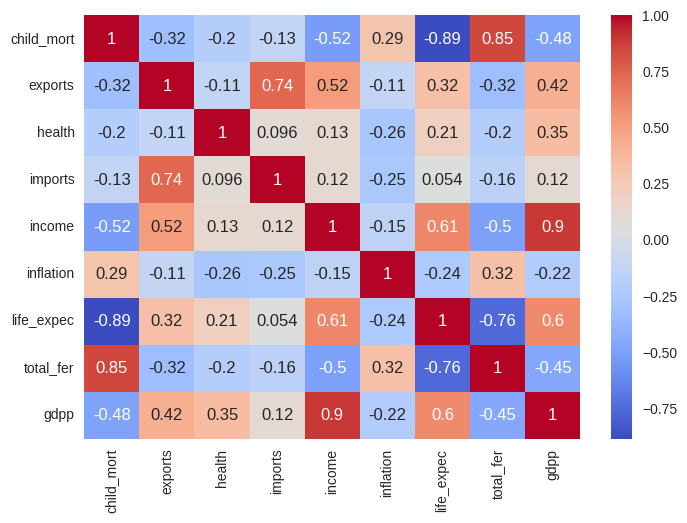

In [12]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# displaying the correlation matrix (heatmap)


Something really cool you can use to plot data other than Seaborn, Matplotlib, etc. is **Plotly**. Using this we can display how any feature here (import, gdpp or any of the others) varies country-wise.
And this can literally be plotted on the world map!

The official documentation- [Choropleth Maps](https://plotly.com/python/choropleth-maps/)

In [14]:
countries_map = list(df.drop('country', axis = 1))
countries_map

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [15]:
countries_map = list(df.drop('country', axis = 1))
countries_map

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [16]:
for column in countries_map:
    fig = px.choropleth(df,
                       geojson = countries_map,
                       locationmode = 'country names',
                       locations = 'country',
                       color = column,
                       title = 'Country by ' + column,
                       color_continuous_scale = 'Greens')

    fig.show()

In [17]:
# explain what all the parameters mean here
for column in countries_map:
    fig = px.choropleth(df,
                       geojson = countries_map,
                       locationmode = 'country names',
                       locations = 'country',
                       color = column,
                       title = 'Country by ' + column,
                       color_continuous_scale = 'Greens')

    fig.show()

# Pre-processing the data

In [18]:
# Dropping the 'country' column for PCA and clustering
df_heatmap.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Stnadardize the data

In [19]:
# Initiate a StandardScaler object and fit it on the numeric columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
df_scaler=pd.DataFrame(scaler.fit_transform(df_heatmap),columns=df_heatmap.columns)
df_scaler.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Dimensionality Reduction using PCA - Principal Component Analysis

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Theory: https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643 and https://rlrocha.medium.com/choosing-the-number-of-components-of-principal-component-analysis-36902a887520

Theory + Implementation.: https://youtu.be/OFyyWcw2cyM (Jump to timestamp - 13:50 for PCA implementaion)

Before we start of with this, **explain what PCA is and why is it necessary?**

Answer:Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a large set of variables into a smaller one that still contains most of the information in the large set.PCA which is the process of reducing the number of features in a dataset while preserving as much of the original information as possible.Sklearn PCA can be used for a variety of tasks, such as data compression, feature extraction, and data visualization.

Reduce the number of dimensions using PCA,

Hints:
1. Initialise instance of PCA and set *n_components* to 0.9 and *random_state* to 20.
2. Fit data_scaled over the PCA instance created
3. Transform data_scaled over the fitted PCA instance and store it in a variable named data_pca.

In [21]:
# code here
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=20)#n_components=This tells PCA to choose the number of components such that 90% of the variance is retained.
#random_state=20: This ensures reproducibility by fixing the random seed.Determines random number generation for selecting a subset of samples.

In [22]:
#pca.fit(df_heatmap) don't fit this data as it is not scaled

In [23]:
#data_pca=pca.transform(df_heatmap)#reurns an array
#data_pca

Let's check the shape of data_pca

In [24]:
# code here
# Should print (167, 5) if everything is correct.# dddddd
#data_pca.shape

In [25]:
pca.fit(df_scaler)# scaled data

PCA(n_components=0.9, random_state=20)

In [26]:
data_pca=pca.transform(df_scaler)

In [27]:
data_pca.shape

(167, 5)

Go through these and display the explained_variance_ratio_ and plot the same

Ref: https://saturncloud.io/blog/what-is-sklearn-pca-explained-variance-and-explained-variance-ratio-difference/ and https://www.jcchouinard.com/pca-explained-variance/

In [28]:
# explained variance#Explained variance (sometimes called “explained variation”) refers to the variance in
# the response variable in a model that can be explained by the predictor variable(s) in the model.
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()

In [29]:
print(f"Explained Variance:\n{explained_variance}")
print(f"Total Explained Variance: {total_explained_variance:.4f}")
#08 specifies power of 10

Explained Variance:
[4.16057017 1.55566165 1.1774338  1.00077724 0.66459866]
Total Explained Variance: 8.5590


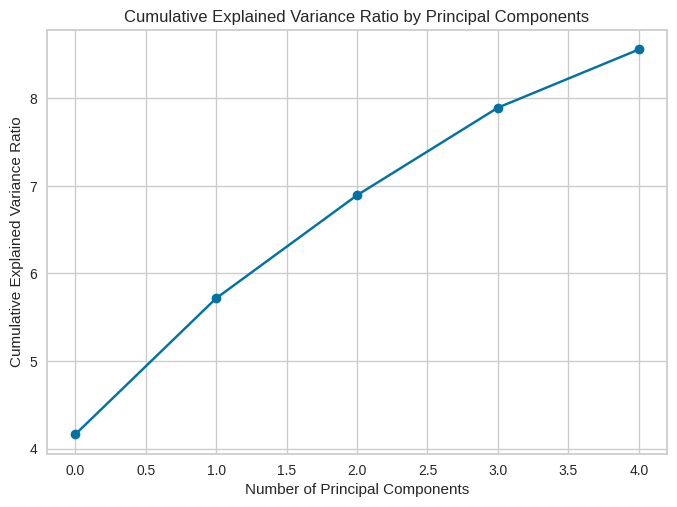

In [30]:
# Plotting the explained variance
cumulative_variance_ratio = np.cumsum(explained_variance)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

In [31]:
# the explained variance ratio, that gives the ratio of each explained variance to the cumulative explained variance.

What do you understand from this?

Answer:The plot above illustrates the cumulative explained variance ratio by the number of principal components. Each point on the curve represents the cumulative proportion of total variance explained as we incrementally add principal components. This visualization can help in determining the optimal number of principal components to retain, balancing the goal of dimensionality reduction with preserving a sufficient amount of information from the original dataset.



# K-Means Clustering (Partition-Based Clustering)

K-means clustering is an essential partitioning algorithm used to categorize a dataset into 'k' distinct, non-overlapping clusters. Each data point is assigned to the cluster with the nearest mean or centroid, symbolizing the cluster's center. The primary goal of the algorithm is to minimize the sum of squared distances between data points and their respective cluster centroids.

For an in-depth exploration of K-means clustering, you can refer to this comprehensive article on Analytics Vidhya: [Comprehensive Guide to K-means Clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/).

For a deeper understanding of the mathematical underpinnings of K-means clustering, Wikipedia is a valuable resource. You can explore the Wikipedia page on K-means clustering for a detailed description: [K-means Clustering Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering). This will help you grasp the mathematical intricacies of the algorithm and its applications in machine learning.

**2 Dimensional Visualization**

In [32]:
## Perform K-Means clustering with interactive widget - give it a second to load, when you change the no. of clusters
def kmeans_clustering(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_pca)#performs the clustering and returns the cluster labels for each data point.

    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')#overlays the centroids of each cluster on the plot using red 'X' markers.
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

low = 1
high = 5
scale = 1
interact(kmeans_clustering, num_clusters=(low, high, scale))#creates an interactive slider widget that allows you to adjust the number of clusters in real-time.

interactive(children=(IntSlider(value=3, description='num_clusters', max=5, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_clustering(num_clusters)>

**3 Dimensional Visualization**

In [33]:
def kmeans_3d_clustering(num_clusters):
    kmeans_3d = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_3d_labels = kmeans_3d.fit_predict(data_pca)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=kmeans_3d_labels, cmap='viridis', edgecolors='k')
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_zlabel('Feature 3 (Standardized)')
    ax.set_title('Kmeans Clustering (3D)')
    plt.show()

interact(kmeans_3d_clustering, num_clusters=(1, 6, 1))

interactive(children=(IntSlider(value=3, description='num_clusters', max=6, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_3d_clustering(num_clusters)>

# Elbow Point

The "elbow point" is a concept often used in the context of K-means clustering to help determine the optimal number of clusters (k) for a given dataset. It is a graphical method that can assist data analysts and machine learning practitioners in finding an appropriate value for k when applying K-means clustering.

The rationale behind the elbow point method is that as you increase the number of clusters (k), the sum of squared distances will generally decrease because data points will be closer to their respective cluster centroids. However, beyond a certain point, subdividing the data into more clusters doesn't provide significant improvements in reducing the sum of squared distances. The elbow point represents that optimal trade-off between the number of clusters and the compactness of each cluster.

It's important to note that the elbow point method is a heuristic and not a foolproof method for determining the ideal k value. In some cases, the elbow point may not be very pronounced, making it challenging to choose the best k. Additionally, the choice of k should also consider domain knowledge and the specific goals of your analysis.


Definition: A technique to find the optimal number of clusters by plotting the sum of squared distances (inertia) against the number of clusters. The "elbow" point is where adding more clusters doesn't significantly reduce inertia.

Elbow Method to determine the number of clusters to be formed:


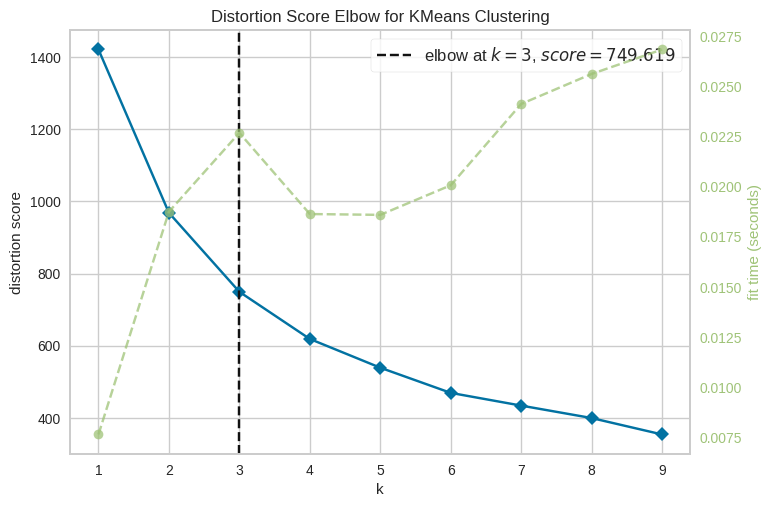

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=(1, 10))
Elbow_M.fit(data_pca)
Elbow_M.show()

# Agglomerative Clustering

It is a hierarchical clustering algorithm used in unsupervised machine learning and data analysis. It is a "bottom-up" or "agglomerative" approach to clustering, where individual data points are initially treated as their own clusters and then progressively merged into larger clusters based on a similarity or distance metric. The result is a tree-like structure called a dendrogram that represents the hierarchical relationships between clusters.

As always, You can find more detailed information about hierarchical clustering, including agglomerative clustering, in the Wikipedia article on "Hierarchical clustering" at the following link: [Hierarchical Clustering Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering). This is the best resource for hierarchical clustering and it is advisable to go through it twice if possible! :)

More ref: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

**2 Dimensional Visualization**

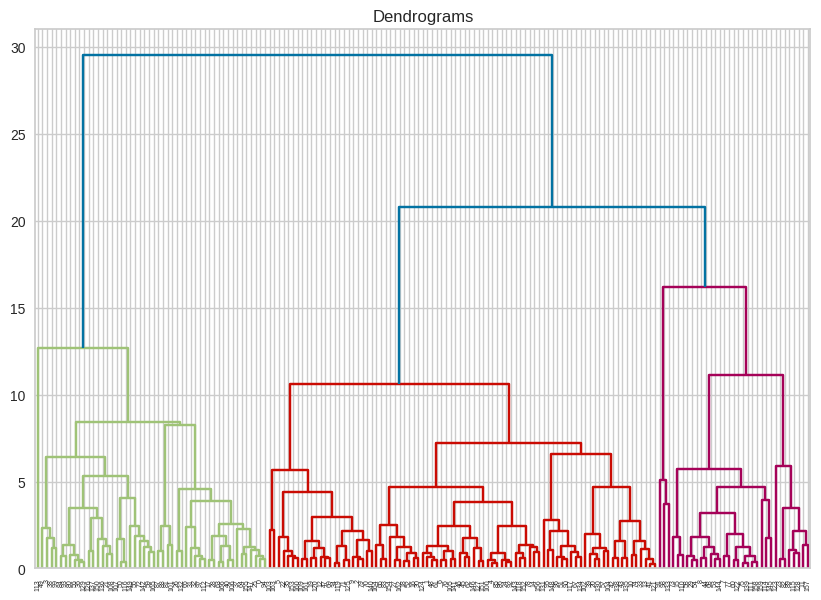

In [35]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_pca, method='ward'))

In [36]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_clustering(num_clusters):
  agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
  agglomerative_labels =agglomerative.fit_predict(data_pca) # write the code

  # write code for plotting
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=data_pca[:, 0],y= data_pca[:, 1], hue=agglomerative_labels, palette="viridis", s=100, alpha=0.7)
  plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
  plt.show()

interact(agglomerative_clustering, num_clusters=(2,10 ,1 ))  # here as well

interactive(children=(IntSlider(value=6, description='num_clusters', max=10, min=2), Output()), _dom_classes=(…

<function __main__.agglomerative_clustering(num_clusters)>

Similar to classification and regression metrics, we have some [clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) to evaluate performance.

We wll explore one of them: [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

Regression metrics measure the accuracy of models that predict continuous values.Classification metrics assess how well a model classifies data into categories (classes)

Clustering metrics are used to evaluate the performance of clustering algorithms, which group data points into clusters based on similarity without using predefined labels (as opposed to classification). These metrics help assess how well the clustering results match the structure or patterns in the data.

a. Silhouette Score:
Definition: Measures how similar each point is to its own cluster compared to other clusters.
Range: -1 to 1.
A score close to 1 means the point is well matched to its own cluster.
A score close to 0 means the point is on the boundary between clusters.
A negative score means the point might be in the wrong cluster.

In [37]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agglo.fit_predict(data_pca)
silhouette = silhouette_score(data_pca, labels)
silhouette

0.5294873792080865

linkage='average'
When to Use linkage='average':
When you want a balance between compactness and spread of clusters.
If you're concerned that both single linkage (too loose) and complete linkage (too strict) might not give the desired clustering results.
In datasets where the clusters have varying shapes or sizes.

Look into any 2 other metrics and give a brief explanation.

Do that here :)

**3 Dimensional Visualization**

In [44]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_clustering_3d(num_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    agglomerative_3d_labels = agglomerative.fit_predict(data_pca)

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                         c=agglomerative_3d_labels, cmap='viridis', s=100, alpha=0.7)

    ax.set_title(f'Agglomerative Clustering with {num_clusters} Clusters')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    fig.colorbar(scatter)
    plt.show()

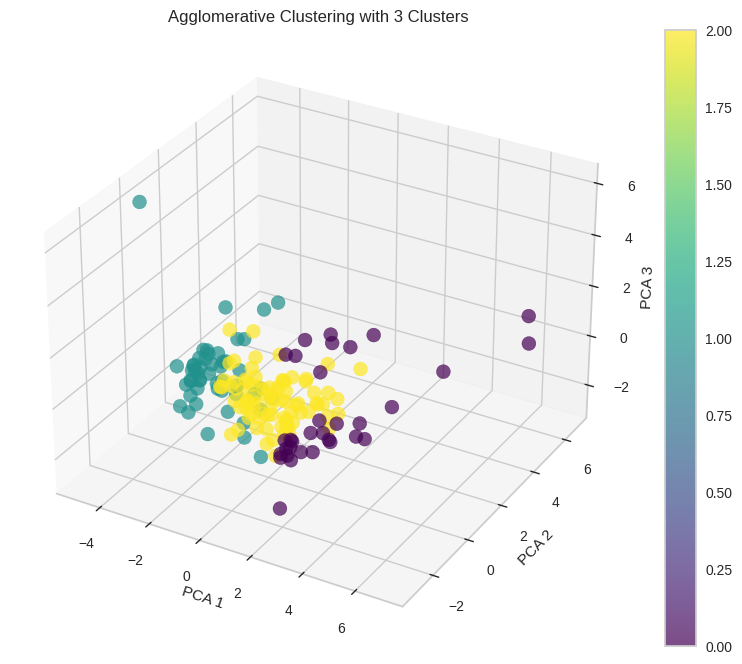

In [45]:
interact(agglomerative_clustering_3d(3))

Look into what dendrograms are and plot them here.

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

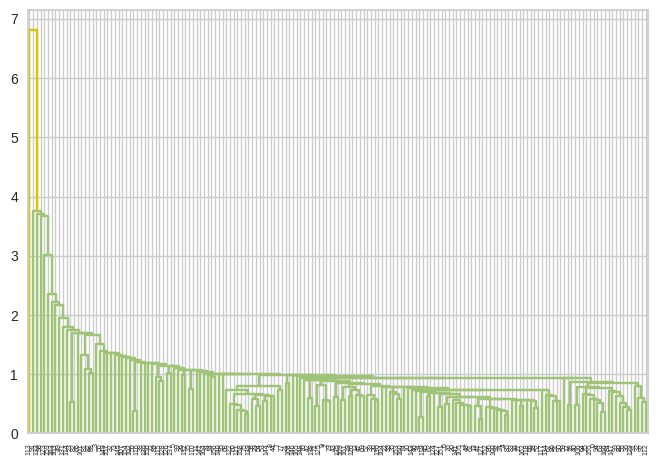

In [60]:
# code here
from scipy.cluster import hierarchy
Z = hierarchy.linkage(data_pca, 'single')#single linkage (minimum distance between clusters).
#The result Z is the linkage matrix that contains information on how clusters are merged at each step.
plt.figure()
dn = hierarchy.dendrogram(Z,orientation='top',above_threshold_color='y')

# DBSCAN Clustering

DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a popular density-based clustering algorithm in unsupervised machine learning. It is particularly useful for discovering clusters of arbitrary shapes in datasets with varying levels of data density. DBSCAN is known for its ability to handle noise and outliers effectively.

As always, You can find additional information about how DBSCAN clustering works in the following article on Analytics Vidhya:

[How DBSCAN Clustering Works](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,points%20into%20a%20single%20cluster.)

This article provides a detailed explanation of DBSCAN, including its underlying concepts, the role of epsilon (ε) and minimum points (MinPts), and practical examples of how to use DBSCAN for clustering. It's a valuable resource for gaining a deeper understanding of the algorithm with Wikipedia as the side resource.

DBSCAN groups together points that are closely packed (points with many nearby neighbors) and marks points that lie alone in low-density regions as outliers.

Core Points: A point is considered a "core" point if at least min_samples points are within its neighborhood (eps distance).
Border Points: Points that are within the neighborhood of a core point but do not have enough neighbors to be core points themselves.
Noise: Points that are neither core nor border points are considered noise or outliers.

**2 Dimensional Visualization**

eps=The maximum distance between two points for them to be considered as neighbors.

minimum samples:The minimum number of points required to form a dense region (a cluster).

In [66]:
# Perform DBSCAN clustering with interactive widget
def dbscan_clustering(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data_pca)  # Compute labels

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=dbscan_labels, palette="viridis", s=100, alpha=0.7)
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()

# Set up interactive widgets with parameter ranges
interact(dbscan_clustering, eps=(0.01, 1.0, 0.01), min_samples=(1, 20, 1))

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

<function __main__.dbscan_clustering(eps, min_samples)>

**3 Dimensional Visualization**

interactive(children=(FloatSlider(value=0.05, description='eps', max=0.1, min=0.01, step=0.01), IntSlider(valu…

<function __main__.dbscan_3d_clustering(eps, min_samples)>

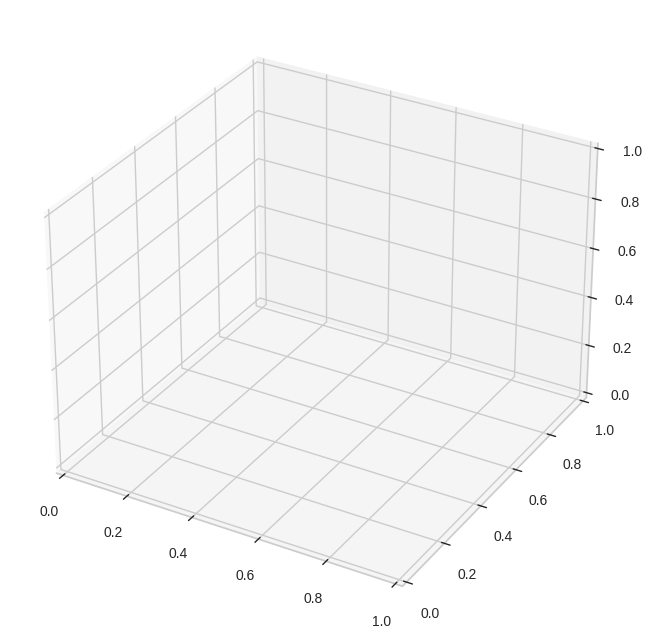

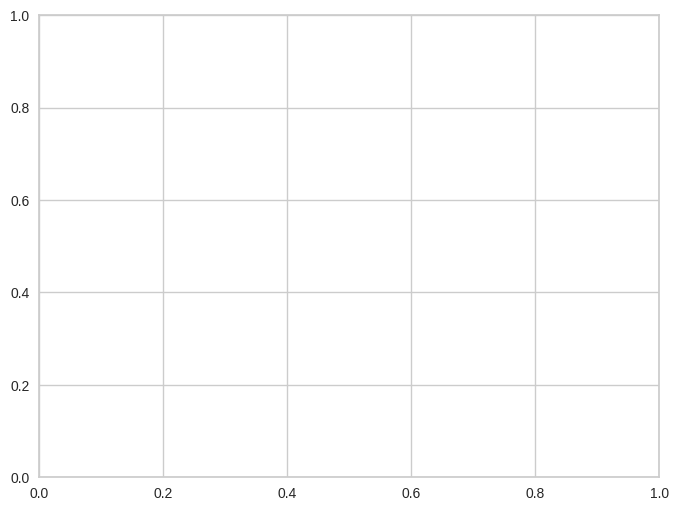

In [69]:
# Perform DBSCAN clustering with interactive widget
def dbscan_3d_clustering(eps, min_samples):
   fig = plt.figure(figsize=(10, 8))
   ax = fig.add_subplot(111, projection='3d')
   dbscan = DBSCAN(eps=eps, min_samples=min_samples)
   dbscan_labels = dbscan.fit_predict(data_pca)  # Compute labels
   plt.figure(figsize=(8, 6))
   sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],z=data_pca[:,2], hue=dbscan_labels, palette="viridis", s=100, alpha=0.7)
   plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
   plt.show()
    # write the function yourselves here

interact(dbscan_3d_clustering, eps=(0.01 ,0.1 ,0.01 ), min_samples=(1,20,1 ))

In [70]:
def dbscan_3d_clustering(eps, min_samples):
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data_pca)  # Compute labels

    # Create 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                         c=dbscan_labels, cmap="viridis", s=100, alpha=0.7)

    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster Label')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.title(f'DBSCAN 3D Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()

# Set up interactive widgets with parameter ranges
interact(dbscan_3d_clustering, eps=(0.01, 1.0, 0.01), min_samples=(1, 20, 1))

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

<function __main__.dbscan_3d_clustering(eps, min_samples)>

# Mean Shift Clustering

It is a density-based clustering algorithm used in unsupervised machine learning and data analysis. Similar to DBSCAN, Mean Shift is capable of discovering clusters with arbitrary shapes and sizes in a dataset. It is particularly useful for applications where the number of clusters is not known in advance and when clusters have varying densities.

For more hands-on information about the Mean Shift clustering algorithm, you can refer to this tutorial on Analytics India Magazine:

[Hands-On Tutorial on Mean Shift Clustering Algorithm](https://analyticsindiamag.com/hands-on-tutorial-on-mean-shift-clustering-algorithm/)

This tutorial provides practical insights into how to implement and use Mean Shift clustering, making it a valuable resource for those looking to apply this clustering technique to real-world data analysis and machine learning tasks especially in the sector of Image Segmentation.

**2 Dimensional Visualization**

In [72]:
# Perform Mean Shift clustering with interactive widget
def meanshift_clustering(n_band):
    mean_shift = MeanShift(bandwidth=n_band)
    mean_shift_labels = mean_shift.fit_predict(data_pca)  # Code here

    # Plot here
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=mean_shift_labels, palette="viridis", s=100, alpha=0.7)
    plt.title(f'Mean Shift Clustering (bandwidth={n_band})')
    plt.show()

interact(meanshift_clustering, n_band=(0.1, 5.0, 0.1)) # enter here

interactive(children=(FloatSlider(value=2.5000000000000004, description='n_band', max=5.0, min=0.1), Output())…

<function __main__.meanshift_clustering(n_band)>

***Congratulations! You have explored various clustering algorithms. Each algorithm has its own advantages and use cases. Remember, choosing the right algorithm and the right number of clusters is crucial. Feel free to experiment with different datasets and parameters to gain a better understanding.***

# **Bonus: To be done only if you have completed the above tasks.**

In this task, we covered clustering and Dimensionality reduction. But still, one aspect of Unsupervised Learning is left to be covered- **Association rules**. Reseach about this topic and mention the different algos that exist.

 Also, look into the functioning of **Spectral Clustering algorithm** and mention it here :)

 The best reseach will be edited and featured on the Synapse Instagram page!!

# **End of Task**

> ©DJS Synapse 2024 - 2025